# DATA CLEANING 

Importing libraries

In [2]:
import numpy as np
import re # Regular Expression Library 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline # will make your plot outputs appear and be stored within the notebook.
import seaborn as sns
from matplotlib import cm #colourmap
from datetime import datetime
import os
import json
import pickle # Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network.
import six # python 2 python 3 compatitbility library
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None # to check the function

UsageError: unrecognized arguments: # will make your plot outputs appear and be stored within the notebook.


Importing all csv files

In [3]:
from glob import glob
ALLCSV = [i for i in glob('*.{}'.format('csv'))]
ALLCSV

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

Reading all csv files

In [9]:
all_dataframes = [] # list to store each data frame seperately
for csv in ALLCSV:
    df = pd.read_csv(csv)
    df['country'] = csv[0:2] # adding column 'country', so that each dataset could be identified uniquely
    all_dataframes.append(df)
    
all_dataframes[0].head() # index 0 - 9 for [CA,DE,FR,GB,IN,JP,KR,MX,RS,US]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


Fixing Data Types

First part of the data cleaning process was to fix the data types of all the columns in order to make them easier to manipulate and be more manageable. It should be noted that for several columns the data type was changed to strings, when the data types are displayed, they show up as objects as strings are a type of object in pandas.

In [10]:
for df in all_dataframes:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') #change data type to str
    
    # trending date
    df['trending_date'] = df['trending_date'].astype('str') 
    date_pieces = (df['trending_date'].str.split('.')) #splitting date at '.'    
    
    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)    # 0-2 index as [year,day,month]
    
    updatedyear = []
    for i in range(len(df)) : 
        y = df.loc[i, "Year"]
        addy = y+2000
        updatedyear.append(addy) # adding 2000 in year   
        
    for i in range(len(df)):
        newy = updatedyear[i]
        tr = df.loc[i, "Year"]
        df['Year'].replace(to_replace = tr, value = newy, inplace=True)  # replacing year with new value
    
    # deleting redundant variables
    del df['trending_date']
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
    
    # title
    df['title'] = df['title'].astype('str')    
    # channel_title
    df['channel_title'] = df['channel_title'].astype('str')    
    # category_id
    df['category_id'] = df['category_id'].astype(str) 
    
    # tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    # thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    # description
    df['description'] = df['description'].astype('str')
    
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

Seperating publish_time into publish_date and publish_time

In [11]:
for df in all_dataframes:
    df.insert(4, 'publish_date', df['publish_time'].dt.date) #loc, column name, values for column to be inserted
    df['publish_time'] = df['publish_time'].dt.time
    
#changing data type for 'publish_date' from object to 'datetime64[ns]'

for df in all_dataframes:
    df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [12]:
df.head()

,video_id,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017-11-14
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017-11-14
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,2017-11-14
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017-11-14
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017-11-14


In [13]:
all_dataframes[1].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [14]:
for df in all_dataframes:
    df.set_index('video_id',inplace=True)

In [15]:
df.head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017-11-14
1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017-11-14
5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,2017-11-14
puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017-11-14
d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017-11-14


Examine missing value using heatmap

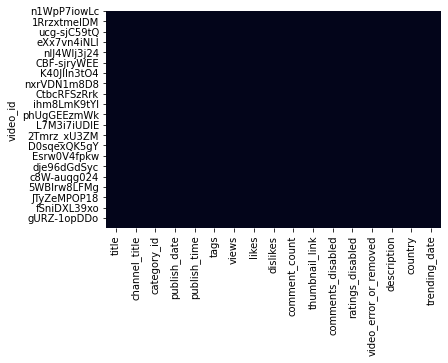

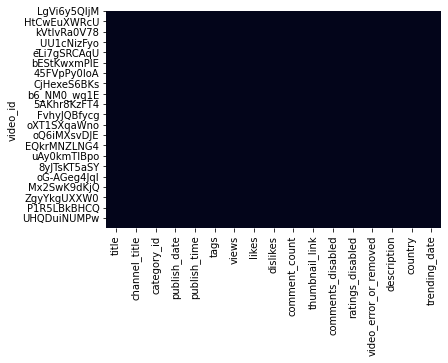

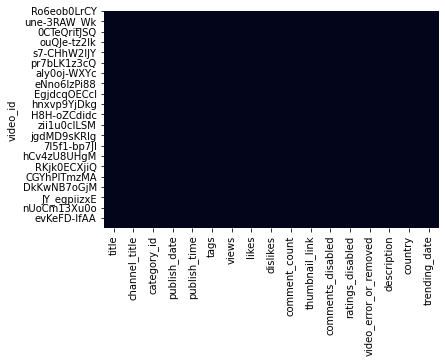

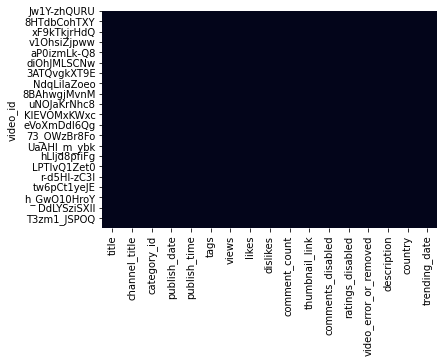

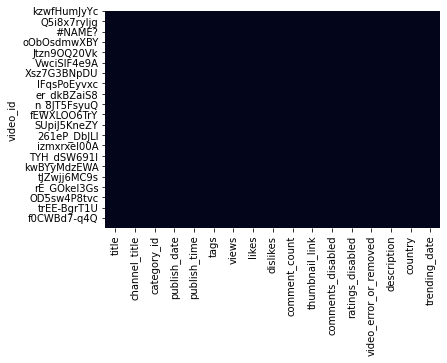

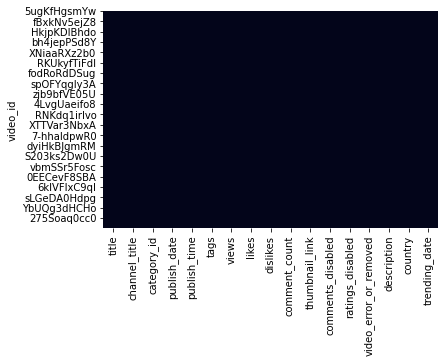

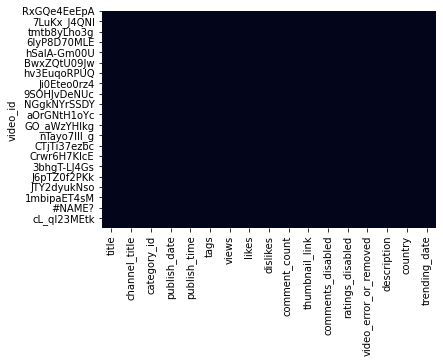

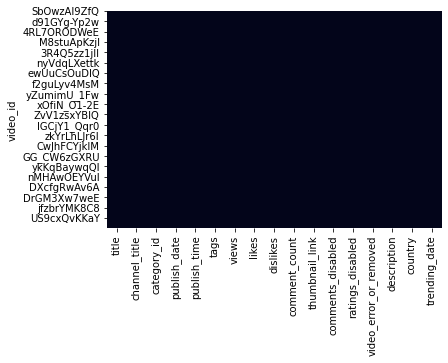

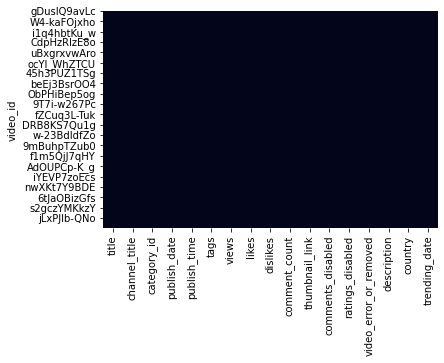

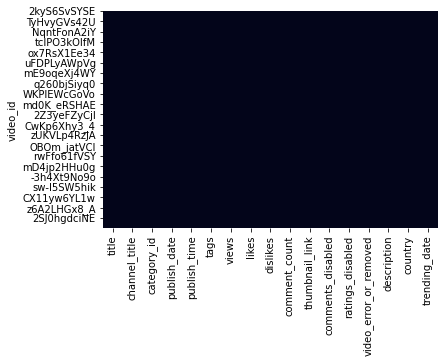

<Figure size 432x288 with 0 Axes>

In [16]:
import seaborn as sns

for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

Combining all dataframes for EDA

In [17]:
combined_df = pd.concat(all_dataframes)

In [18]:
# Creating duplicate df as safety precaution
# Sort by trending_date for relevancy
# Use video_id as Index
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

# Removing duplicates on original combined df
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')

# Same process for individual df
for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
    
#print to see latest publications at the top
combined_df[['publish_date','publish_time','trending_date','country']].head()


,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,US
NXwn1iUbbJU,2018-06-13,20:13:30,2018-06-14,FR
AN2KspjYRLc,2018-06-12,15:07:36,2018-06-14,FR
WGKOBMZAwuM,2018-06-13,07:00:05,2018-06-14,FR
zauQhWWpa0s,2018-06-13,23:34:13,2018-06-14,FR


Inserting Category Column

In [19]:
import json

#exploring catergory_id

with open('US_category_id.json','r') as f:
    data = f.read()
    
obj = json.loads(data)

obj

#there are 44 category id in these json files

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

Mapping each json category to category_id using .map()

In [41]:
category_id = {}

with open('DE_category_id.json','r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']

#the process for combined_df        
combined_df.insert(2,'category', combined_df['category_id'].map(category_id))

#the process for backup_df
backup_df.insert(2,'category', backup_df['category_id'].map(category_id))

#print
combined_df.head(3)

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,20,2018-05-17,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-06-14
NXwn1iUbbJU,Série ADJA - Episode 28,Marodi TV Sénégal,Entertainment,24,2018-06-13,20:13:30,"senegal|""video""|""divertissement""|""humour""|""you...",213980,3940,188,801,https://i.ytimg.com/vi/NXwn1iUbbJU/default.jpg,False,False,False,Retrouvez - nous sur http://www.marodi.tv ou t...,FR,2018-06-14
AN2KspjYRLc,UN YOUTUBER DANS L'EMISSION LA PLUS GÊNANTE DE...,Chelxie,Comedy,23,2018-06-12,15:07:36,"youtuber|""skyyart""|""les 12 coeurs""|""emission g...",176036,3673,1625,456,https://i.ytimg.com/vi/AN2KspjYRLc/default.jpg,False,False,False,un youtuber dans une emission génante france l...,FR,2018-06-14


In [21]:
#checking for all categories

combined_df['category'].unique()

array(['Gaming', 'Entertainment', 'Comedy', 'Sports', 'Music',
       'Howto & Style', 'Film & Animation', 'People & Blogs', 'Education',
       'News & Politics', 'Pets & Animals', nan, 'Shows',
       'Travel & Events', 'Autos & Vehicles', 'Science & Technology',
       'Movies', 'Trailers'], dtype=object)

# Exploratory Data Analysis

Ratio of likes-dislikes in different categories

<AxesSubplot:xlabel='ratio', ylabel='category'>

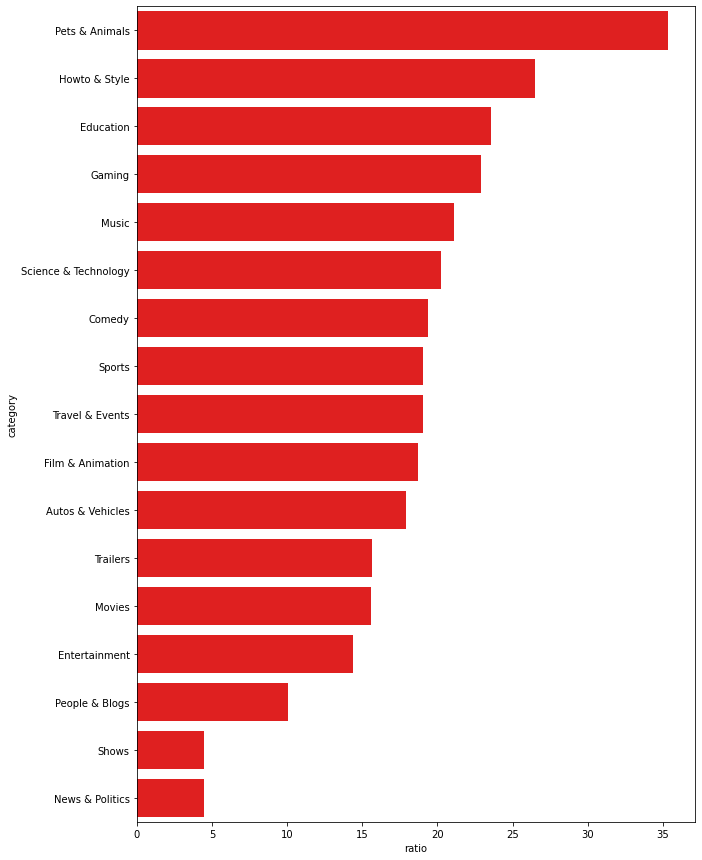

In [42]:
#calculating total likes for each category

likesdf = combined_df.groupby('category')['likes'].agg('sum')

#calculating total dislikes for each category

dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')

#calculating ratios of likes to dislikes

ratiodf = likesdf/dislikesdf

#most liked category to appear on top

ratiodf = ratiodf.sort_values(ascending=False).reset_index()

#plotting bar chart
ratiodf.columns = ['category','ratio'] #forming a table
plt.subplots(figsize=(10,15))
sns.barplot(x="ratio",y="category" , data=ratiodf, label="likes-dislikes ratio", color="r")

Observations: 

    We see that videos belonging to the pets and animals categories have the highest ratio of likes to dislikes videos among the trending categories whereas new and politics videos have the least. From this we can infer that people are less divided on the content of videos based on entertainment than compared to topics such as new, whose content can lead to a division of opinions among the user

Liked videos by countries

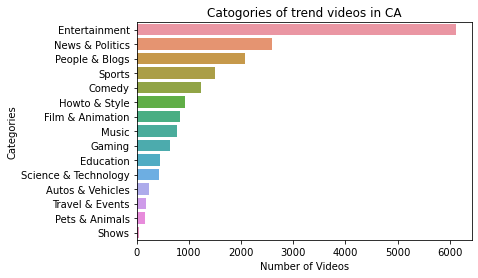

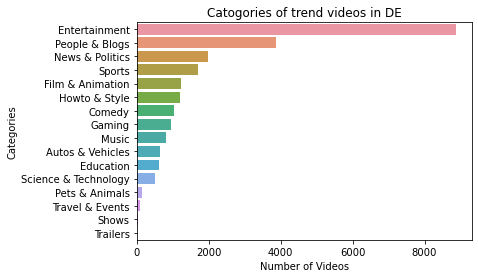

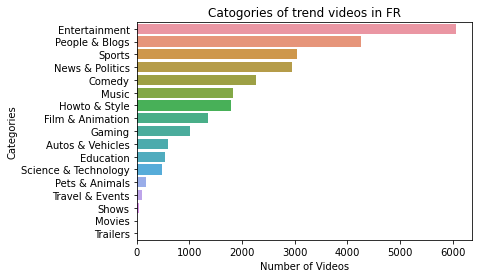

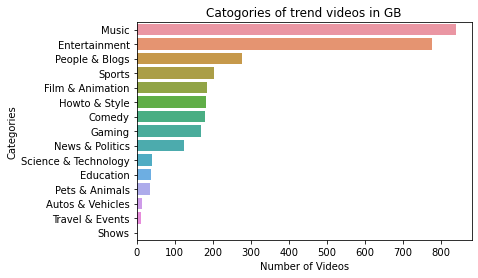

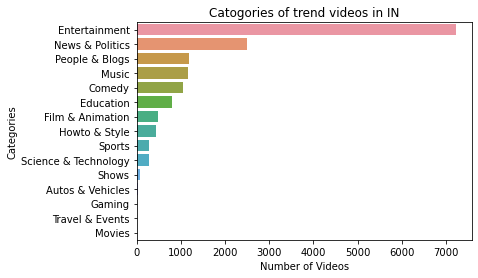

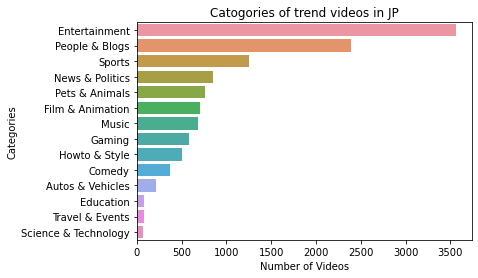

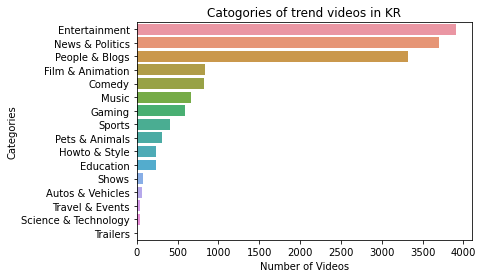

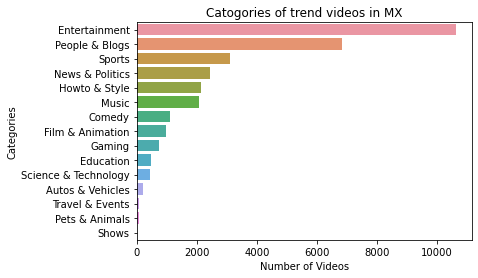

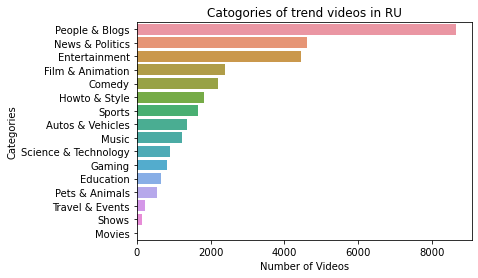

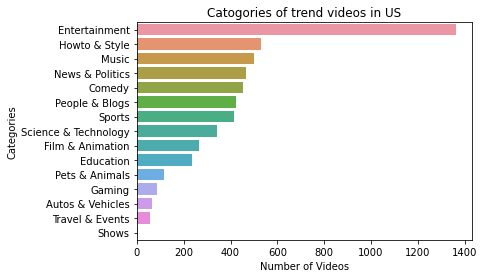

In [23]:
#getting names of all countries
countries = []
from glob import glob
allcsv = [i for i in glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
    
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index() #temp table
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

Observation:

    Apart from RU and GB, category most liked by the users in each of the other countries is ‘Entertainment’.

    Viewers from RU prefer the category ‘People and Blogs’ the most.

    Viewers from GB prefer the category ‘Music’ the most.

    Categories ‘Shows’, ‘Movies’, and ‘Trailers’ were the least liked ones in almost all of the countries.

Top 5 videos that are on trending in each country

In [35]:
temporary = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)
    
# Printing US
temporary[9][['title', 'channel_title', 'views', 'likes']]

,title,channel_title,views,likes
video_id,,,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923,5023450
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,149376127,3093544
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,148689896,3094021
zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,139334502,1425496
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,123010920,5613827


Observations:

    Users from every country mostly prefer videos belonging to the categories of ‘Music’ and ‘Entertainment’, potentially meaning users usually use the platform for recreational purposes in comparisons to other uses

Most liked and most trending

In [43]:
temporary = [] # to store results for each country
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)
    
# Printing US
temporary[9][['title','views', 'likes']]

,title,views,likes
video_id,,,
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,225211923,5023450
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,148689896,3094021
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544
kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,36857298,2729292


Observation:
    
    Although it may not seem easily visible, we concluded that most liked video is not the most trending one. This was further proven when we continued deeper into the data set and supporting information, we came to the conclusion that the most trending video is often the most viewed video (in combination with several other factors).

How long from published video to be trending

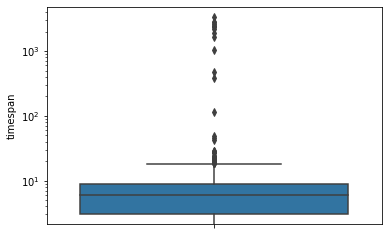

C:\Users\ikhw_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


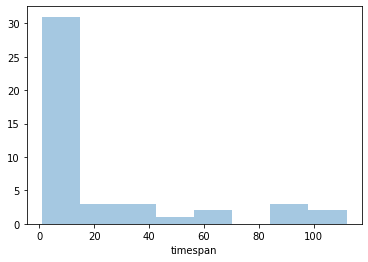

In [44]:
# Calculating days between publish and trending date
temporary = []

for data in all_dataframes:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
    
# Plotting
to_trending = temporary[9].sample(1000).groupby('video_id').timespan.max() # US
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)

Observation:

    As we can see from both plots above, most videos take less a 100 days to reach the trending page. This can be attributed to viral natural of content on the internet, that if some online content is popular, it will often be shared and viewed within it’s short time span of relevancy.

Users like which category

In [46]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

<ipython-input-46-77f7060752ca>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())


,views,likes
category,,
Entertainment,17588684816,471875235
Music,18175188197,444810358
Comedy,4573395735,218752101
People & Blogs,5606737191,157767404
Howto & Style,2215631503,77250720


Observation:

     As we can see, most liked category is ‘Entertainment’ for all countries. This shows user preference to use YouTube as an entertainment platform.

Frequent occuring words in tags and descriptions

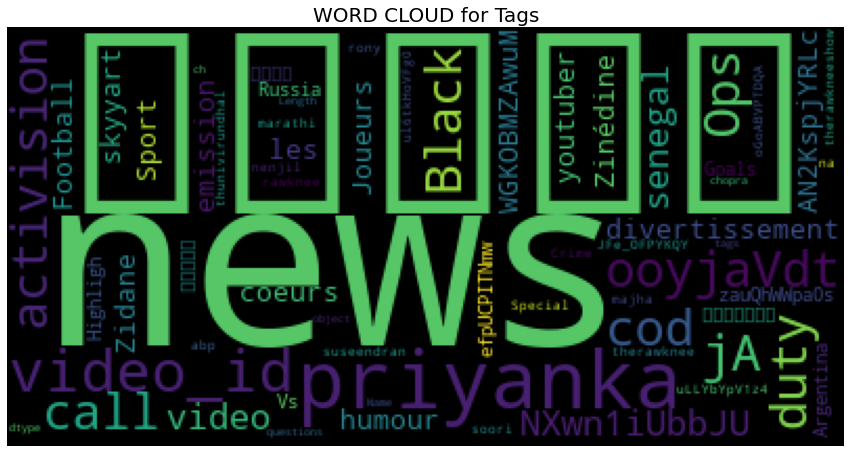

In [62]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# For tags
    
plt.figure(figsize = (15, 15))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_words = 1000,max_font_size = 120, random_state = 42
).generate(str(combined_df['tags']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Tags', fontsize = 20)
plt.axis('off')
plt.show()

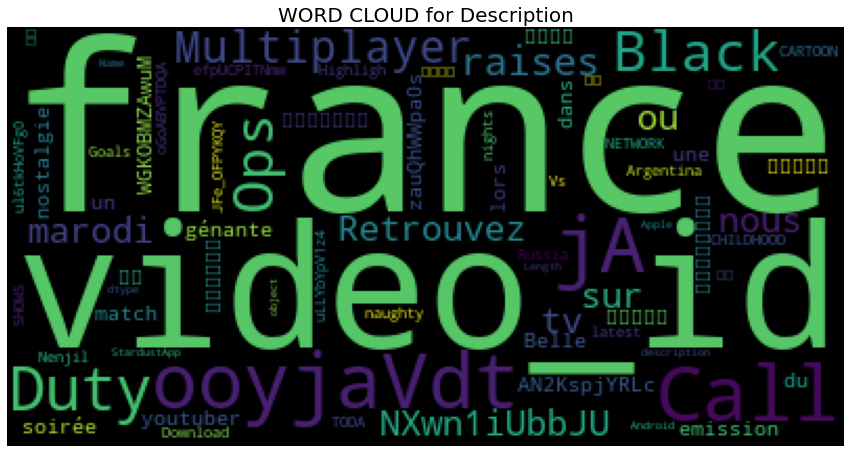

In [64]:
# For description
    
plt.figure(figsize = (15, 15))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',stopwords = stopwords,max_words = 1000,max_font_size = 120,random_state = 42
).generate(str(combined_df['description']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Description', fontsize = 20)
plt.axis('off')
plt.show()

Correaltion between views, likes, dislikes, and comments

In [65]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.768352,0.378172,0.423572
likes,0.768352,1.000000,0.435397,0.700513
dislikes,0.378172,0.435397,1.000000,0.667473
comment_count,0.423572,0.700513,0.667473,1.000000


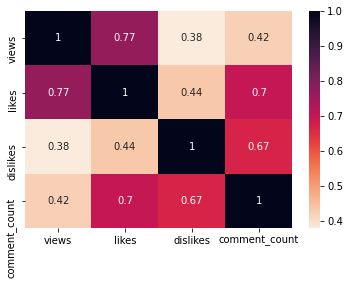

In [69]:
#heatmap
dataplot = sns.heatmap(corr, cmap="rocket_r", annot=True)
plt.show()

Observation:
        
        When evaluating the correlation between all the variables, the correlation of each feature with itself is also included, which is always 1, so that is why the graph always has the darker colour diagonal from the upper left to the lower right.

    We can see from the results, there is a positive relation between views and likes, likes and comment_count, dislikes and comment_count. We came to this conclusion as anytime the correlation coefficient, denoted as corr, is greater than zero, it’s a positive relationship.